
# superwiser: Dr Garshasbi
## Alireza Saqafi



In [1]:
# installing used packages
# !pip install sympy
# !pip install numpy

In [2]:
import numpy as np




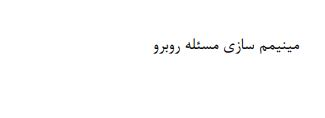
##   $$ F[u]=\frac{1}{2} \int_{x_0}^{x_1} x^2(t) +u^4(t) dt$$ 
$$s.t$$
## $$ \dot x =x+u $$
## $$ x(0)=1$$

In [3]:
from sympy import *
#creating variables

t=Symbol(' t  ', real=True) 
x=Function('x')(t)
u=Function('u')(t)
p=Function('p')(t)

F=Eq(Function('F')(u),1/2*Integral (x**2 + u**4,(t,0,1)))
F

Eq(F(u( t  )), 0.5*Integral(u( t  )**4 + x( t  )**2, ( t  , 0, 1)))

In [4]:
#giving initial conditions by building dictionary
ics={x.subs(t,0):1,p.subs(t,1):0}
ics

{x(0): 1, p(1): 0}

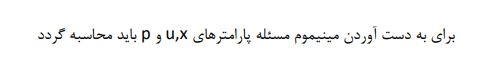

In [5]:
f=Eq(Function('f')(x,u,t),x+u)
f

Eq(f(x( t  ), u( t  ),  t  ), u( t  ) + x( t  ))

In [6]:
g=Eq(Function('g')(x,u,t),1/2*(x**2 + u**4))
g

Eq(g(x( t  ), u( t  ),  t  ), 0.5*u( t  )**4 + 0.5*x( t  )**2)

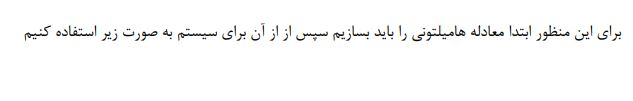

In [7]:
H=Eq(Function('H')(x,u,p,t),g.rhs+p*f.rhs)
H

Eq(H(x( t  ), u( t  ), p( t  ),  t  ), (u( t  ) + x( t  ))*p( t  ) + 0.5*u( t  )**4 + 0.5*x( t  )**2)

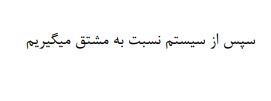

In [8]:
equ1=Eq(p.diff().diff(),-p.diff()-x.diff())
equ1

Eq(Derivative(p( t  ), ( t  , 2)), -Derivative(p( t  ),  t  ) - Derivative(x( t  ),  t  ))

In [9]:
a=Eq(H.rhs.diff(u),0)
a

Eq(p( t  ) + 2.0*u( t  )**3, 0)

In [10]:
u_t=solve(a,u)[0]
Eq(u,u_t)

Eq(u( t  ), 0.7937005259841*(-p( t  ))**(1/3))

In [11]:
#replacement
equ2=Eq(p.diff().diff(),2*p)
equ2

Eq(Derivative(p( t  ), ( t  , 2)), 2*p( t  ))

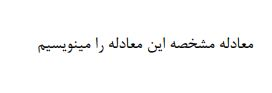

In [12]:
solution=dsolve(equ2)
solution

Eq(p( t  ), C1*exp(-sqrt(2)* t  ) + C2*exp(sqrt(2)* t  ))

In [13]:
equ3=solution.subs({t:1,p:0})
equ3

Eq(0, C1*exp(-sqrt(2)) + C2*exp(sqrt(2)))

In [14]:
x_t=Eq(x,-solution.rhs.diff(t)-solution.rhs)
x_t

Eq(x( t  ), -C1*exp(-sqrt(2)* t  ) + sqrt(2)*C1*exp(-sqrt(2)* t  ) - sqrt(2)*C2*exp(sqrt(2)* t  ) - C2*exp(sqrt(2)* t  ))

In [15]:
equ4=x_t.subs({t:0,x:1})
equ4

Eq(1, -C1 + sqrt(2)*C1 - sqrt(2)*C2 - C2)

In [16]:
freevar=x_t.subs({t:0,x:1}).free_symbols
freevar

{C1, C2}

In [17]:
par_sol=solve([equ3,equ4],freevar)
par_sol

{C1: exp(2*sqrt(2))/(-exp(2*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(2*sqrt(2))),
 C2: -1/(-exp(2*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(2*sqrt(2)))}

In [18]:
p_t=solution.subs(par_sol)
p_t

Eq(p( t  ), -exp(sqrt(2)* t  )/(-exp(2*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(2*sqrt(2))) + exp(2*sqrt(2))*exp(-sqrt(2)* t  )/(-exp(2*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(2*sqrt(2))))

In [19]:
x_t.subs(par_sol).simplify()

Eq(x( t  ), ((1 + sqrt(2))*exp(2*sqrt(2)* t  ) + (-1 + sqrt(2))*exp(2*sqrt(2)))*exp(-sqrt(2)* t  )/(-exp(2*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(2*sqrt(2))))

In [20]:
u_t.subs(p,p_t.rhs)

0.7937005259841*(exp(sqrt(2)* t  )/(-exp(2*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(2*sqrt(2))) - exp(2*sqrt(2))*exp(-sqrt(2)* t  )/(-exp(2*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(2*sqrt(2))))**(1/3)